Mounted at /content/drive
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dense_3 (Dense)             (None, 20)                820       
                                                                 
 dense_4 (Dense)             (None, 40)                840       
                                                                 
 dense_5 (Dense)             (None, 1)                 41        
                                                                 
Total params: 3,341
Trainable 

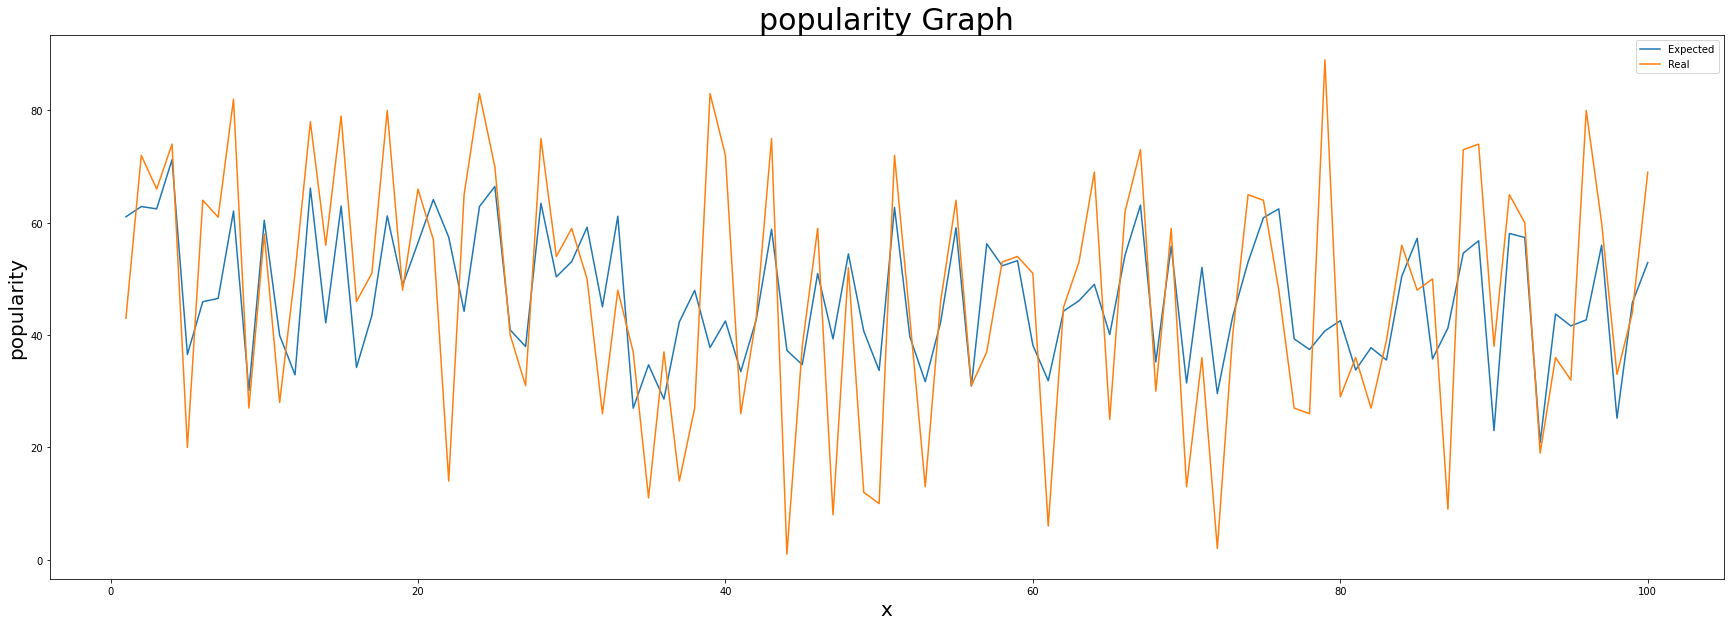

In [1]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt 
import seaborn as sns 

import pandas as pd 
import numpy as np 

import google.colab.drive as drive 

drive.mount('/content/drive') 
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/data/aip_final_q1.csv') 

df_tgt = df[['total_tracks', 't_dur0', 't_energy0', 't_speech0', 't_acous0', 't_tempo0', 'popularity']] 

df_tgt = pd.get_dummies(df_tgt) 
df_tgt = df_tgt.fillna(df_tgt.mean()) 

scaler = MinMaxScaler() 
scaler.fit(df_tgt) 
arr = scaler.transform(df_tgt) 
df1 = pd.DataFrame(arr, columns = df_tgt.columns) 

df1_corr = df1.corr() 
df1_corr_sort = df1_corr.sort_values('popularity', ascending = False) 
df1_corr_sort['popularity'].head(7) 

cols_train = ['total_tracks', 't_dur0', 't_energy0', 't_speech0', 't_acous0', 't_tempo0']
X_train_pre = df1[cols_train] 
y = df1['popularity'].values 
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size = 0.2) 

model = Sequential() 
model.add(Dense(10, input_dim = X_train.shape[1], activation = 'relu')) 
model.add(Dense(30, activation = 'relu')) 
model.add(Dense(40, activation = 'relu')) 
model.add(Dense(20, activation = 'relu')) 
model.add(Dense(40, activation = 'relu')) 
model.add(Dense(1)) 
model.summary() 

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse']) 

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10) 
modelpath = './drive/MyDrive/Colab Notebooks/data/model/wine/Homework4_model.hdf5' 
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0, save_best_only = True) 

history = model.fit(X_train, y_train, epochs = 500, batch_size = 200, validation_split = 0.25, verbose = 1, callbacks = [early_stopping_callback, checkpointer]) 

Real = [] 
Expected = [] 
X_num = [] 

n_iter = 0 
Y_prediction = model.predict(X_test).flatten() 
for i in range(100):
  real = y_test[i] * (df['popularity'].max() - df['popularity'].min()) + df['popularity'].min()
  prediction = Y_prediction[i] * (df['popularity'].max() - df['popularity'].min()) + df['popularity'].min()
  print("Real: {:.2f}, Expected: {:.2f}".format(real, prediction))
  Real.append(real)
  Expected.append(prediction)
  n_iter = n_iter + 1
  X_num.append(n_iter) 

plt.figure(figsize=(30, 10))
plt.title('popularity Graph', fontsize = 30)
plt.xlabel('x', fontsize = 20)
plt.ylabel('popularity', fontsize = 20)
plt.plot(X_num, Expected, label = 'Expected')
plt.plot(X_num, Real, label = 'Real')
plt.legend()
plt.show()